In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

<AxesSubplot:>

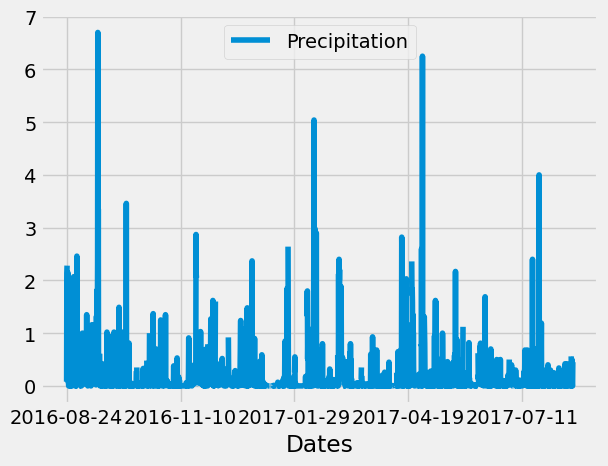

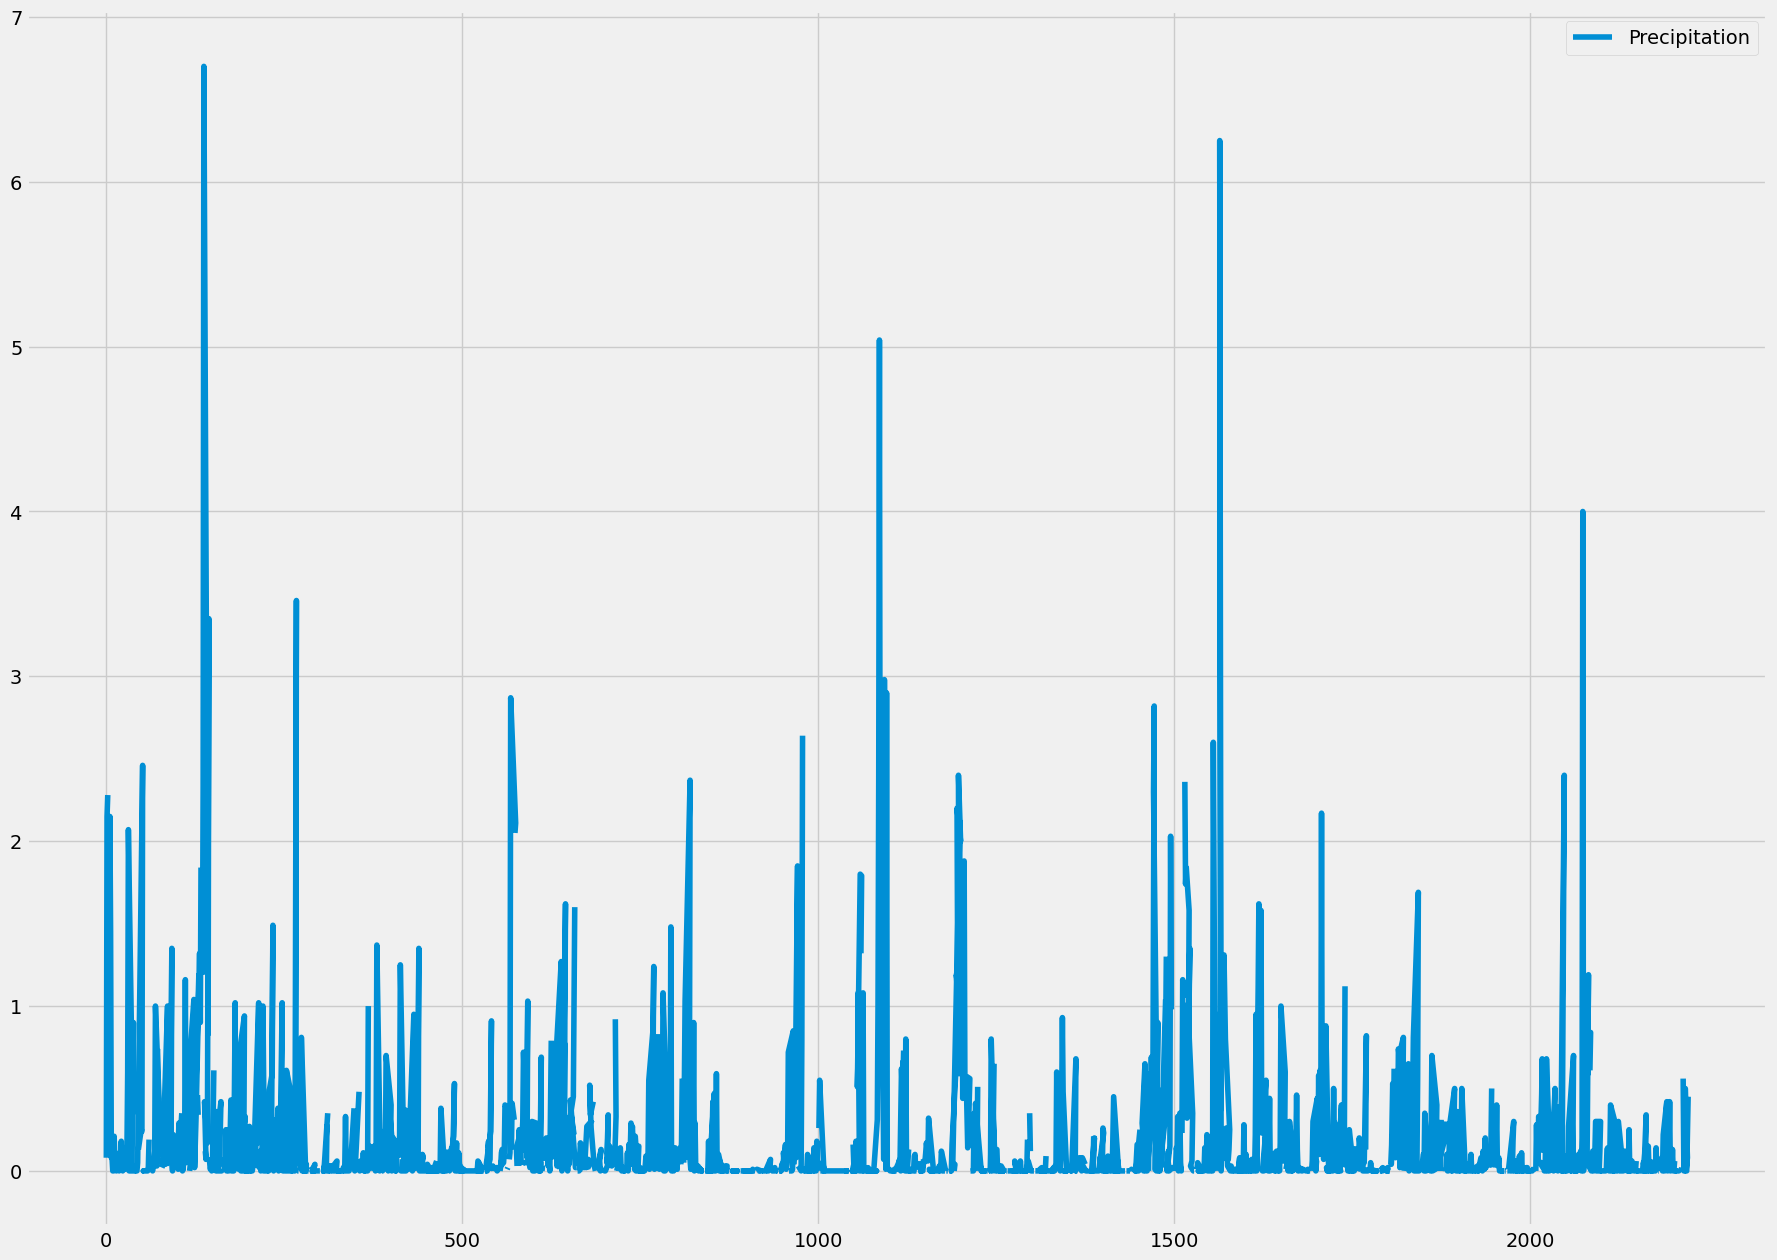

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > "2016-08-23").\
    order_by(Measurement.date).all()
precip_data

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
one_year

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip_data, columns = ["Precipitation", "Dates"])
df.set_index("Dates")

# Sort the dataframe by date
df_dates = df.sort_values(by = "Dates")

# Use Pandas Plotting with Matplotlib to plot the data
df_dates.plot(x = "Dates", grid = True)
df_dates.plot(figsize = (20, 15))

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
all_stations = session.query(func.count(Measurement.station)).all()
all_stations

[(19550,)]

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
    
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
        func.avg(Measurement.tobs)).\
        filter(Measurement.station == "USC00519281").all()
    
active_stations_data

[(54.0, 85.0, 71.66378066378067)]

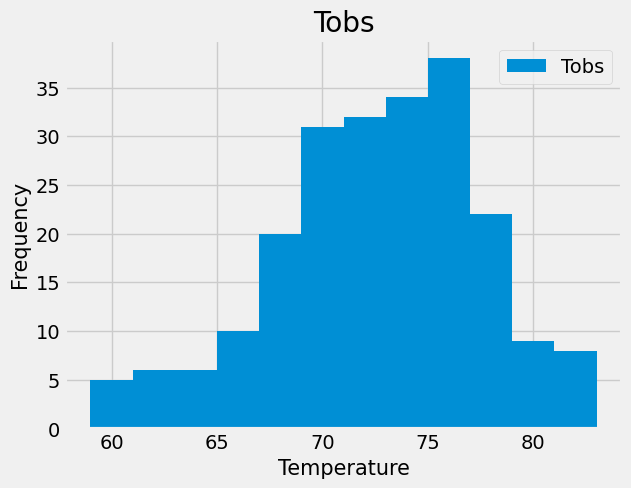

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = session.query(Measurement.date).filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date.desc()).first()

one_year_temp = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
one_year_temp

results = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= "2017, 8, 23").all()
    
#Plot Results into histogram

graph_df = pd.DataFrame(results, columns = ["Tobs"])
graph_df.hist(bins = 12)

plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Temperature", fontsize = 15)
labels = ["Tobs"]
plt.legend(labels)

# Close session

In [36]:
# Close Session
session.close()